In [1]:
pip install tensorflow keras opencv-python numpy matplotlib scikit-learn


  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
  Using cached keras-3.13.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.12.19-py2.py3-none-any.whl.metadata (1.0 kB)
  Using cached gast-0.7.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-6.33.2-cp310-abi3-win_amd64.whl.metadata (593 bytes)
  Using cached termcolor-3.2.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached wrapt-2.0.1-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached grpcio-1.76.0-cp313-cp313-win_amd64.whl.metadata (3.8 kB)
  Using


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\LENOVO LOQ\Desktop\RN- 2\train model\venv\Scripts\python.exe -m pip install --upgrade pip


In [2]:
pip install ipykernel


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\LENOVO LOQ\Desktop\RN- 2\train model\venv\Scripts\python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

DATASET_PATH = r"C:\Users\LENOVO LOQ\Desktop\AnxietySense-A-Multi-Model-AI-Ecosystem-for-Life-Stage-Based-Mental-Health-Support\train model\data new\face data"

IMG_SIZE = 48
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

emotion_labels = train_data.class_indices
print("Emotion labels:", emotion_labels)


C:\Users\LENOVO LOQ\Desktop\RN- 2\train model\venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


Found 28711 images belonging to 2 classes.
Found 7176 images belonging to 2 classes.
Emotion labels: {'test': 0, 'train': 1}


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(emotion_labels), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


C:\Users\LENOVO LOQ\Desktop\RN- 2\train model\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,202 (1.35 MB)

 Trainable params: 355,202 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15
)


Epoch 1/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 828s 918ms/step - accuracy: 0.7998 - loss: 0.5083 - val_accuracy: 0.8000 - val_loss: 0.5040
Epoch 2/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 0.8000 - loss: 0.5051 - val_accuracy: 0.8000 - val_loss: 0.5007
Epoch 3/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.8000 - loss: 0.5037 - val_accuracy: 0.8000 - val_loss: 0.5005
Epoch 4/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.8000 - loss: 0.5032 - val_accuracy: 0.8000 - val_loss: 0.5005
Epoch 5/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.8000 - loss: 0.5018 - val_accuracy: 0.8000 - val_loss: 0.5009
Epoch 6/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.8000 - loss: 0.5018 - val_accuracy: 0.8000 - val_loss: 0.5004
Epoch 7/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.8000 - loss: 0.5016 - val_accuracy: 0.8000 - val_loss: 0.5004
Epoch 8/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.8000 - loss: 0.5014 

In [6]:
model.save("face_emotion_cnn.h5")
print("Model saved successfully!")


Model saved successfully!


In [7]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

model = load_model("face_emotion_cnn.h5")

emotion_dict = {v:k for k,v in emotion_labels.items()}

face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)


In [8]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        face = gray[y:y+h, x:x+w]
        face = cv2.resize(face, (48,48))
        face = face / 255.0
        face = face.reshape(1,48,48,1)

        pred = model.predict(face)
        emotion = emotion_dict[np.argmax(pred)]

        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)
        cv2.putText(frame, emotion, (x,y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,0,0), 2)

    cv2.imshow("Face Emotion Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


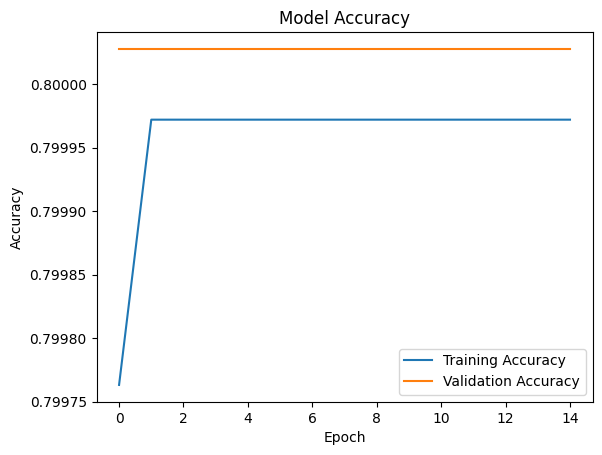

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [11]:
loss, accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {accuracy*100:.2f}%")


225/225 ━━━━━━━━━━━━━━━━━━━━ 25s 110ms/step - accuracy: 0.8000 - loss: 0.5004
Validation Accuracy: 80.00%
